** First Steps for Dataset

Download the file https://physionet.org/physiobank/database/chbmit/chb01/chb01_01.edf


In [ ]:
# Please start by installing those two Python packages
#!pip install pyedflib
#!pip install PyWavelets

In [ ]:
# And load those libraries
!pip install pyedflib
import pyedflib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import linear_model
import pywt
import matplotlib.patches as patches
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization,LSTM,Dense
from tensorflow.keras.utils import to_categorical


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 47.9 MB/s eta 0:00:00


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the edf file
f = pyedflib.EdfReader("/content/drive/My Drive/SAC10547/chb01_01.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

# and load the data into a DataFrame
df_signals = pd.DataFrame(sigbufs)
df_signals = df_signals.transpose()
df_signals.columns = signal_labels

In [ ]:
df_signals  #viewing the data

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
0,-145.934066,-104.517705,-42.783883,-33.015873,-170.940171,-110.769231,11.916972,-56.459096,-139.291819,-1.367521,...,57.240537,44.737485,74.822955,-106.080586,84.590965,43.174603,-57.240537,-264.713065,94.749695,44.737485
1,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,0.195360,0.195360
3,0.195360,0.586081,0.195360,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,1.367521,0.195360,-2.148962,0.195360,0.195360,0.195360,-0.586081,1.758242,0.195360,0.195360
4,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.976801,0.195360,0.195360,0.195360,0.586081,-2.148962,0.195360,0.195360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,13.870574,11.135531,48.253968,6.056166,-7.619048,7.228327,38.876679,42.002442,-0.976801,7.619048,...,22.466422,23.638584,-16.996337,16.605617,11.135531,-47.863248,-42.783883,32.234432,11.135531,23.638584
921596,-1.758242,21.294261,54.114774,-10.354090,-25.201465,23.247863,49.816850,14.261294,-0.586081,9.181929,...,14.261294,15.824176,-31.452991,28.717949,18.559219,-53.724054,-27.936508,31.843712,0.976801,15.824176
921597,-11.526252,23.638584,48.644689,-17.777778,-34.969475,38.095238,40.048840,0.976801,-2.148962,1.758242,...,-2.539683,16.996337,-17.387057,24.810745,18.949939,-48.253968,-11.916972,0.976801,-7.228327,16.996337
921598,-2.930403,27.545788,45.128205,-20.512821,-25.982906,48.644689,33.797314,-6.446886,-2.148962,2.930403,...,-9.963370,22.466422,-1.758242,28.717949,20.512821,-44.737485,-3.711844,-15.824176,-10.354090,22.466422


And our data has 921600 rows and 23 features .We have no missing values in our data ,also all features have floating point.

In [ ]:
df_signals.isna().sum() #checking missing values

FP1-F7      0
F7-T7       0
T7-P7       0
P7-O1       0
FP1-F3      0
F3-C3       0
C3-P3       0
P3-O1       0
FP2-F4      0
F4-C4       0
C4-P4       0
P4-O2       0
FP2-F8      0
F8-T8       0
T8-P8       0
P8-O2       0
FZ-CZ       0
CZ-PZ       0
P7-T7       0
T7-FT9      0
FT9-FT10    0
FT10-T8     0
T8-P8       0
dtype: int64

In [ ]:
df_signals.info() #checking basic info of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921600 entries, 0 to 921599
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FP1-F7    921600 non-null  float64
 1   F7-T7     921600 non-null  float64
 2   T7-P7     921600 non-null  float64
 3   P7-O1     921600 non-null  float64
 4   FP1-F3    921600 non-null  float64
 5   F3-C3     921600 non-null  float64
 6   C3-P3     921600 non-null  float64
 7   P3-O1     921600 non-null  float64
 8   FP2-F4    921600 non-null  float64
 9   F4-C4     921600 non-null  float64
 10  C4-P4     921600 non-null  float64
 11  P4-O2     921600 non-null  float64
 12  FP2-F8    921600 non-null  float64
 13  F8-T8     921600 non-null  float64
 14  T8-P8     921600 non-null  float64
 15  P8-O2     921600 non-null  float64
 16  FZ-CZ     921600 non-null  float64
 17  CZ-PZ     921600 non-null  float64
 18  P7-T7     921600 non-null  float64
 19  T7-FT9    921600 non-null  float64
 20  FT9-

1.Introduction:

EEG stands for Electroencephalogram. It's a non-invasive technique used to record electrical activity in the brain. This is done by placing electrodes on the scalp, which pick up the electrical signals generated by the brain's neurons.

2.Temporal Resolution: EEG provides excellent temporal resolution, meaning it can capture changes in brain activity that occur in real-time. This makes it suitable for studying fast cognitive processes and even detecting abnormalities in brain function.

3.Frequency Analysis: EEG can break down brain signals into different frequency bands (like delta, theta, alpha, beta, and gamma waves). Different frequencies are associated with different states of brain activity, such as relaxation, alertness, or deep sleep.

4.Clinical Applications: EEG is used in clinical settings to diagnose and monitor various neurological disorders, such as epilepsy, sleep disorders, and certain brain injuries. It can also be used in neuropsychology to assess cognitive function.

5.Research on Brain Disorders: EEG recordings from individuals with different brain-related diseases, like epilepsy, Alzheimer's disease, or schizophrenia, can provide crucial insights into the specific neural patterns associated with these conditions.

6.Comparative Studies: By comparing EEG recordings from individuals with brain-related diseases to those from healthy controls, researchers can identify differences in brain activity. This can help in understanding the underlying mechanisms of these diseases and potentially lead to better treatments.

7.Experimental Studies: EEG is commonly used in experiments to investigate various aspects of cognition, such as attention, memory, perception, and language processing. Researchers can use EEG to track changes in brain activity while participants perform specific tasks.

8.Neurofeedback and Brain-Computer Interfaces: EEG can be used for neurofeedback, a technique where individuals learn to control their brainwave patterns. It's also a critical component of Brain-Computer Interfaces (BCIs) which enable direct communication between the brain and external devices.

Data:
A study was conducted at the Children's Hospital Boston where EEG was recorded on pediatric subjects with intractable (i.e. epileptic) seizures. There were 22 subjects in the study: 5 male, ages 3-22, and 17 females, ages 1.5-19; subject 21 was evaluated a second time 1.5 years later, thus re- sulting in 23 cases. Each case contains between 9 and 42 continuous .edf fles from a single subject, typically consisting of one hour each. Prior to measuring, subjects were taken of of any anti- seizure medication. The files can be found at https://physionet.org/physiobank/database/chbmit/

 EEG Samples:
Most of the EEG files have 23 recordings from electrodes placed around the head of the patient. Figures 1 and 2 present two EEG recordings of 10 seconds each. The first one was recorded at 1:43pm, while the patient was awake, and so should represent normal activity of the brain. The second one was recorded 50 minutes later. Within this 10 seconds, the patient experiences one epileptic seizure. As the size of the EEG makes it diffcult to assess how much bigger the amplitudes are when the patient is experiencing a seizure, Figure 3 zooms in on one channel for the non-seizure and seizure activity. Here we begin to see a marked difference between the two.

Preprocessing:
•	Pre-process the EEG signals to remove noise and artefacts. This includes applying Notch filtering to eliminate power line interference and using the Unscented Kalman Filter (UKF) to address baseline drift in EEG signals.

Feature Extraction:
•	Extract relevant features from the pre-processed EEG signals. This involves computing Power Spectral Density (PSD) using the Welch-Bartlett method to capture frequency domain information associated with different brain activities.

Temporal Characteristic Analysis:
•	Calculate statistical measures (mean, variance, standard deviation, skewness, and kurtosis) to capture temporal characteristics of brain activity and identify abnormalities.

Spatial Pattern Analysis:
•	Utilize Common Spatial Patterns to determine scalp topography and reveal spatial patterns specific to different brain states or tasks.

Interpretability and Visualization:
•	Focus on interpretability and understanding of the fused features. This is crucial in medical applications where insights into the prediction process are highly valuable for healthcare professionals.

Multi-modal Data Fusion:
•	Design a deep learning model capable of handling multi-modal data by fusing features from frequency, time, and spatial domains.

Model Selection:
•	Propose Long Short-Term Memory (LSTM) Recurrent Neural Networks (RNNs) as the underlying model to capture complex temporal or spatial patterns in the sequential data.

Optimization:
•	Utilize the Adam optimizer to find the optimal set of model parameters, which allows for efficient convergence and adaptive learning rate adjustments.

Training and Evaluation:
•	Train the deep learning model on the pre-processed EEG data, using appropriate performance metrics to monitor convergence and model performance.

Deployment:
•	Deploy the trained model to predict brain/nervous system-related diseases based on real-time or near-real-time EEG data.

Performance Metrics:
•	Use metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) to measure the model's predictive capability.






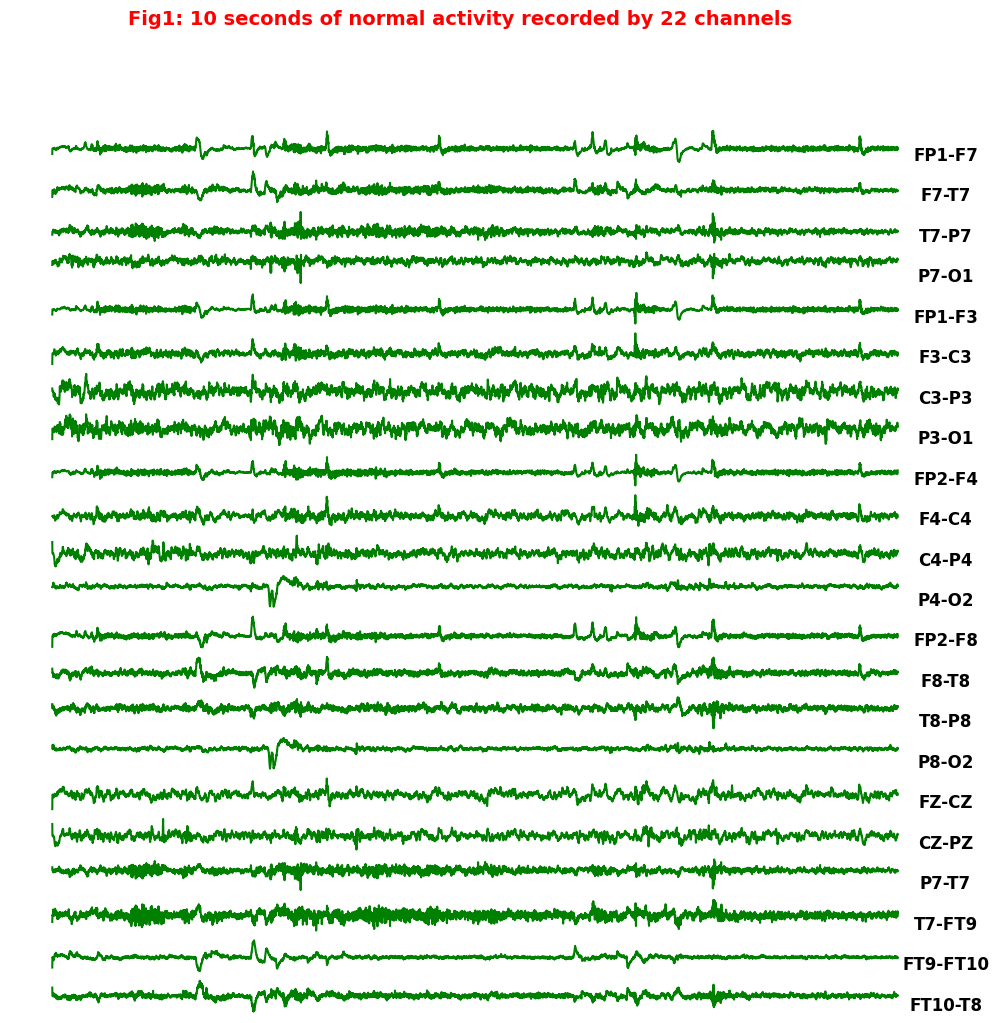

In [ ]:
ax = ['ax'+str(i) for i in range(23)]
C = df_signals.columns
plt.figure(figsize=(12,12))
plt.suptitle("Fig1: 10 seconds of normal activity recorded by 22 channels", fontsize= 14,fontweight='bold',color='red')
for i in range(22):
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[0:10240],"green")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=12, rotation=0,fontweight='bold')
    ax[i].yaxis.set_label_position("right")


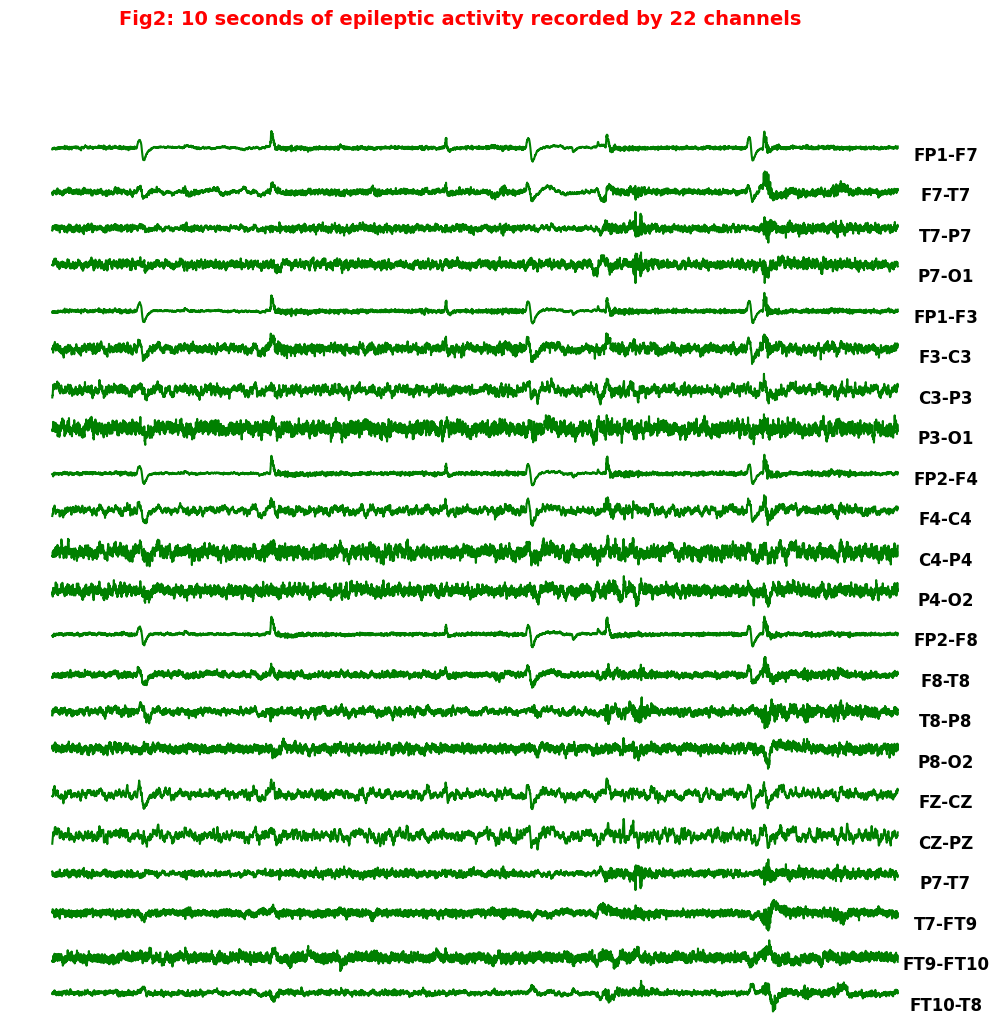

In [ ]:
ax = ['ax'+str(i) for i in range(23)]
C = df_signals.columns

plt.figure(figsize=(12,12))
plt.suptitle("Fig2: 10 seconds of epileptic activity recorded by 22 channels", fontsize= 14,fontweight='bold',color='red')
for i in range(22):
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[766976:(777216)],"green")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=12, rotation=0,fontweight='bold')
    ax[i].yaxis.set_label_position("right")

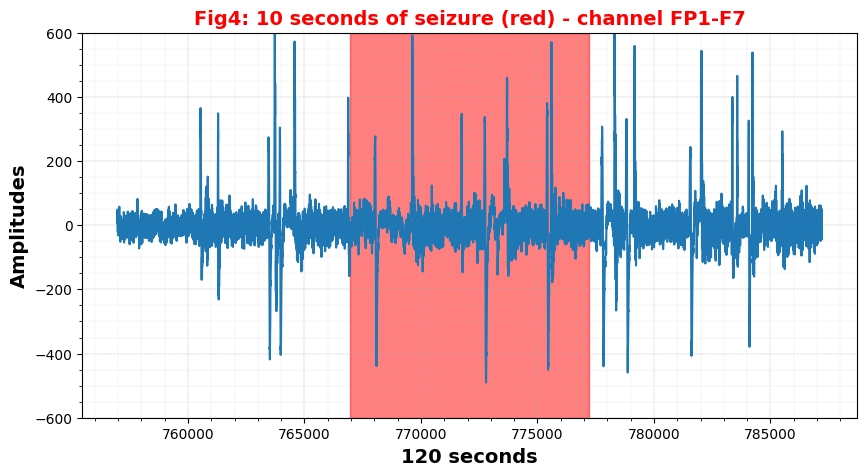

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_signals['FP1-F7'].iloc[756976:787216])
plt.axvspan(766976, 777216, alpha=0.5, color='red')
plt.title("Fig4: 10 seconds of seizure (red) - channel FP1-F7", fontsize =14,fontweight='bold',color='red')
plt.xlabel("120 seconds", fontsize =14,fontweight='bold')
plt.ylabel("Amplitudes", fontsize =14,fontweight='bold')
plt.ylim((-600,600))
plt.grid(which = "major", linestyle='dashed',linewidth=0.3)
plt.grid(which = "minor", linewidth = 0.1,linestyle='dashed')
plt.minorticks_on()
plt.show()

In [ ]:
#@title Data Preprocessing

In [ ]:
!pip install mne
import mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.7 MB/s eta 0:00:00


To preprocess EEG signals and remove noise and artifacts, you can follow these steps:

Apply Notch Filtering:

Notch filtering is used to eliminate power line interference, which typically occurs at 50 or 60 Hz depending on the region.

Scipy:

SciPy is a collection of mathematical algorithms and convenience functions built on NumPy . It adds significant power to Python by providing the user with high-level commands and classes for manipulating and visualizing data.

Scipy Signal:

The signal processing toolbox currently contains some filtering functions, a limited set of filter design tools, and a few B-spline interpolation algorithms for 1- and 2-D data. While the B-spline algorithms could technically be placed under the interpolation category, they are included here because they only work with equally-spaced data and make heavy use of filter-theory and transfer-function formalism to provide a fast B-spline transform. To understand this section, you will need to understand that a signal in SciPy is an array of real or complex numbers.

In [ ]:
!pip install --upgrade scipy
from scipy import signal

def apply_notch_filter(data, sampling_rate, notch_freq):
    nyquist = 0.5 * sampling_rate
    q = 30.0
    freq = notch_freq / nyquist
    b, a = signal.iirnotch(freq, Q=q, fs=sampling_rate)
    sos = signal.tf2sos(b, a)
    filtered_data = signal.sosfreqz(sos, data)
    return filtered_data

# Assuming you've loaded the data and created df_signals as before

sampling_rate = f.getSampleFrequencies()[0]
notch_freq = 60  # or 60 depending on your region
df_signals = apply_notch_filter(df_signals, sampling_rate, notch_freq)


For Unscented Kalman filter ,You can refer this documentation https://filterpy.readthedocs.io/en/latest/kalman/UnscentedKalmanFilter.html

In [ ]:
import numpy as np

# Assuming df_signals is a 1D array or list of data
filtered_signals = apply_notch_filter(df_signals, sampling_rate, notch_freq)


In [ ]:
filtered_signals

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        ...,
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
        [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j]]))

1.	Data Collection and Curation:
•	Collect a large and well-curated dataset of EEG recordings, including samples from individuals with different brain-related diseases and healthy controls.
2.	Model Validation:
•	Validate the deep learning algorithm on an independent dataset to verify its generalizability. This proposed model is implemented using Python software.
3.	Data Pre-processing:
•	Pre-process the EEG signals to remove noise and artefacts. This includes applying Notch filtering to eliminate power line interference and using the Unscented Kalman Filter (UKF) to address baseline drift in EEG signals.
4.	Feature Extraction:
•	Extract relevant features from the pre-processed EEG signals. This involves computing Power Spectral Density (PSD) using the Welch-Bartlett method to capture frequency domain information associated with different brain activities.
5.	Temporal Characteristic Analysis:
•	Calculate statistical measures (mean, variance, standard deviation, skewness, and kurtosis) to capture temporal characteristics of brain activity and identify abnormalities.
6.	Spatial Pattern Analysis:
•	Utilize Common Spatial Patterns to determine scalp topography and reveal spatial patterns specific to different brain states or tasks.
7.	Interpretability and Visualization:
•	Focus on interpretability and understanding of the fused features. This is crucial in medical applications where insights into the prediction process are highly valuable for healthcare professionals.
8.	Multi-modal Data Fusion:
•	Design a deep learning model capable of handling multi-modal data by fusing features from frequency, time, and spatial domains.
9.	Model Selection:
•	Propose Long Short-Term Memory (LSTM) Recurrent Neural Networks (RNNs) as the underlying model to capture complex temporal or spatial patterns in the sequential data.
10.	Optimization:
•	Utilize the Adam optimizer to find the optimal set of model parameters, which allows for efficient convergence and adaptive learning rate adjustments.
11.	Training and Evaluation:
•	Train the deep learning model on the pre-processed EEG data, using appropriate performance metrics to monitor convergence and model performance.
12.	Deployment:
•	Deploy the trained model to predict brain/nervous system-related diseases based on real-time or near-real-time EEG data.
13.	Performance Metrics:
•	Use metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) to measure the model's predictive capability.

